<a href="https://colab.research.google.com/github/arpan-sharma/Machine-learning_projects/blob/main/social_media_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1  In Any Ml Project First Of All We Check it's a **Supervised Learning**     hoge ? or **Unsupervised Learning** hoge ya **Reinforcement Learning** hoge

Q2 Check it's a Classification problem or Regression Problem 

Q3 it's a Batch Learning or Online Learning (batch_learning:- isme data ek baar diya jata hai ) [online_learning:- isme data set change hota rahta hai prediction ke liye]  

In [34]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings

# Mount Drive

In [35]:
train = pd.read_csv('/content/drive/MyDrive/twitter_data/train.csv', encoding='ISO-8859-1')
# train_original=train.copy()

# Overview Train Data

In [36]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [37]:
train.info()
train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


,id,label
count,31962.000000,31962.000000
mean,15981.500000,0.070146
std,9226.778988,0.255397
min,1.000000,0.000000
25%,7991.250000,0.000000
50%,15981.500000,0.000000
75%,23971.750000,0.000000
max,31962.000000,1.000000


In [38]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# train.hist(bins=50, figsize=(20, 15))

In [39]:
test = pd.read_csv('/content/drive/MyDrive/twitter_data/test.csv')
test_original=test.copy()

# **Data Pre-Processing**

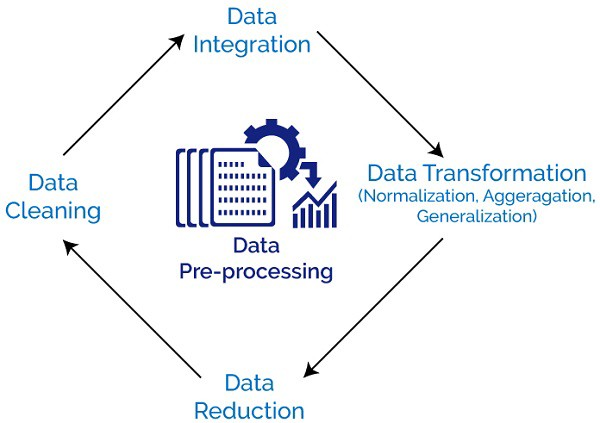

# STEP — 1 :

# Combine the train.csv and test.csv files.

In [40]:
combine = train.append(test,ignore_index=True,sort=True)
combine.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


In [41]:
combine.tail()

,id,label,tweet
49154,49155,NaN,thought factory: left-right polarisation! #tru...
49155,49156,NaN,feeling like a mermaid ð #hairflip #neverre...
49156,49157,NaN,#hillary #campaigned today in #ohio((omg)) &am...
49157,49158,NaN,"happy, at work conference: right mindset leads..."
49158,49159,NaN,"my song ""so glad"" free download! #shoegaze ..."


# STEP — 2
#*Removing* Twitter Handles(@User)

In [42]:
def remove_pattern(text,pattern):
    
    # re.findall() finds the pattern i.e @user and puts it in a list for further task
    r = re.findall(pattern,text)
    
    # re.sub() removes @user from the sentences in the dataset
    for i in r:
        text = re.sub(i,"",text)
    
    return text

In [43]:
combine['Tidy_Tweets'] = np.vectorize(remove_pattern)(combine['tweet'], "@[\w]*")
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


# STEP — 3

# Removing Punctuation, Numbers, and Special Characters

In [44]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].str.replace("[^a-zA-Z#]", " ")
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.Ã°Â...,the next school year is the year for exams ...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land #allin #cavs #champ...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here i m it s so #gr


# STEP — 4

# Removing Short Words

In [45]:
combine['Tidy_Tweets'] = combine['Tidy_Tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combine.head(10)

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society #motivation
5,6,0.0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...
6,7,0.0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny
7,8,0.0,the next school year is the year for exams.Ã°Â...,next school year year exams think about that #...
8,9,0.0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...
9,10,0.0,@user @user welcome here ! i'm it's so #gr...,welcome here


# STEP — 5

# Tokenization

#Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.

In [46]:
tokenized_tweet = combine['Tidy_Tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [when, father, dysfunctional, selfish, drags, ...
1    [thanks, #lyft, credit, cause, they, offer, wh...
2                              [bihday, your, majesty]
3                     [#model, love, take, with, time]
4                   [factsguide, society, #motivation]
Name: Tidy_Tweets, dtype: object

#STEP — 6

#Stemming

#Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word.
#For example — “play”, “player”, “played”, “plays” and “playing” are the different variations of the word — “play”

In [47]:
from nltk import PorterStemmer

ps = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [ps.stem(i) for i in x])

tokenized_tweet.head()

0    [when, father, dysfunct, selfish, drag, kid, i...
1    [thank, #lyft, credit, caus, they, offer, whee...
2                              [bihday, your, majesti]
3                     [#model, love, take, with, time]
4                         [factsguid, societi, #motiv]
Name: Tidy_Tweets, dtype: object

In [48]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combine['Tidy_Tweets'] = tokenized_tweet
combine.head()

,id,label,tweet,Tidy_Tweets
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunct selfish drag kid into dys...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thank #lyft credit caus they offer wheelchair ...
2,3,0.0,bihday your majesty,bihday your majesti
3,4,0.0,#model i love u take with u all the time in ...,#model love take with time
4,5,0.0,factsguide: society now #motivation,factsguid societi #motiv


In [49]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests

In [50]:
all_words_positive = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==0])

In [51]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_positive)

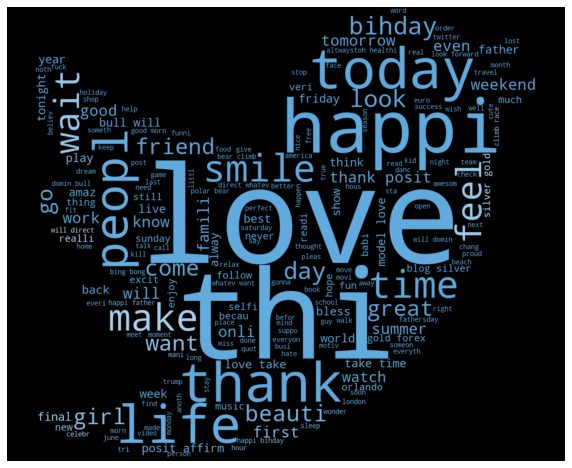

In [52]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="hamming")

plt.axis('off')
plt.show()

In [53]:
all_words_negative = ' '.join(text for text in combine['Tidy_Tweets'][combine['label']==1])

In [54]:
# combining the image with the dataset
Mask = np.array(Image.open(requests.get('http://clipart-library.com/image_gallery2/Twitter-PNG-Image.png', stream=True).raw))

# We use the ImageColorGenerator library from Wordcloud 
# Here we take the color of the image and impose it over our wordcloud
image_colors = ImageColorGenerator(Mask)

# Now we use the WordCloud function from the wordcloud library 
wc = WordCloud(background_color='black', height=1500, width=4000,mask=Mask).generate(all_words_negative)


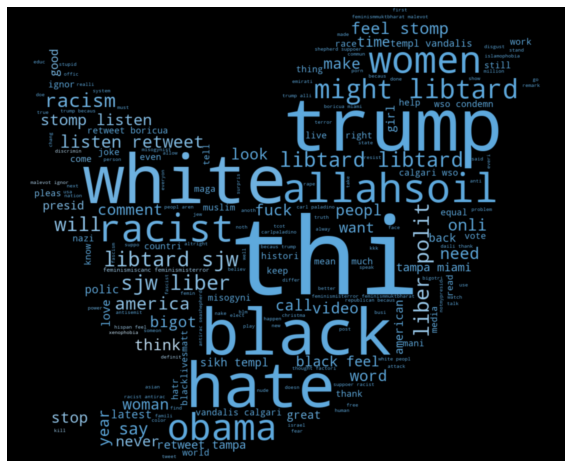

In [55]:
# Size of the image generated 
plt.figure(figsize=(10,20))

# Here we recolor the words from the dataset to the image's color
# recolor just recolors the default colors to the image's blue color
# interpolation is used to smooth the image generated 
plt.imshow(wc.recolor(color_func=image_colors),interpolation="gaussian")

plt.axis('off')
plt.show()

# Function to extract hashtags from tweets

In [56]:
def Hashtags_Extract(x):
    hashtags=[]
    
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r'#(\w+)',i)
        hashtags.append(ht)
    
    return hashtags

In [57]:
ht_positive = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==0])

ht_positive

[['run'],
 ['lyft', 'disapoint', 'getthank'],
 [],
 ['model'],
 ['motiv'],
 ['allshowandnogo'],
 [],
 ['school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl'],
 ['allin', 'cav', 'champion', 'cleveland', 'clevelandcavali'],
 [],
 ['ireland', 'blog', 'silver', 'gold', 'forex'],
 ['orlando',
  'standwithorlando',
  'pulseshoot',
  'orlandoshoot',
  'biggerproblem',
  'selfish',
  'heabreak',
  'valu',
  'love'],
 ['gettingf'],
 ['got', 'junior', 'yugyoem', 'omg'],
 ['thank', 'posit'],
 ['friday', 'cooki'],
 [],
 ['euro'],
 ['badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh'],
 ['wine', 'weekend'],
 ['tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad'],
 ['upsideofflorida', 'shopalyssa', 'love'],
 ['smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback'],
 ['ica'],
 [],
 ['rip', 'orlando'],
 [],
 ['alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian'],
 [],
 ['goodnight', 'badmonday'],
 ['taylorswift'],
 ['travelingram', 'dalat', 'ripinkyli

In [58]:
ht_positive_unnest = sum(ht_positive,[])
print(ht_positive_unnest)

['run', 'lyft', 'disapoint', 'getthank', 'model', 'motiv', 'allshowandnogo', 'school', 'exam', 'hate', 'imagin', 'actorslif', 'revolutionschool', 'girl', 'allin', 'cav', 'champion', 'cleveland', 'clevelandcavali', 'ireland', 'blog', 'silver', 'gold', 'forex', 'orlando', 'standwithorlando', 'pulseshoot', 'orlandoshoot', 'biggerproblem', 'selfish', 'heabreak', 'valu', 'love', 'gettingf', 'got', 'junior', 'yugyoem', 'omg', 'thank', 'posit', 'friday', 'cooki', 'euro', 'badday', 'coneofsham', 'cat', 'piss', 'funni', 'laugh', 'wine', 'weekend', 'tgif', 'gamedev', 'indiedev', 'indiegamedev', 'squad', 'upsideofflorida', 'shopalyssa', 'love', 'smile', 'media', 'pressconfer', 'antalya', 'turkey', 'throwback', 'ica', 'rip', 'orlando', 'alohafriday', 'time', 'not', 'exist', 'positivevib', 'hawaiian', 'goodnight', 'badmonday', 'taylorswift', 'travelingram', 'dalat', 'ripinkylif', 'photoshop', 'enoughisenough', 'dontphotoshopeveryth', 'wheresallthenaturalphoto', 'cedarpoint', 'thank', 'posit', 'book

In [59]:
ht_negative = Hashtags_Extract(combine['Tidy_Tweets'][combine['label']==1])
ht_negative

[['cnn', 'michigan', 'tcot'],
 ['australia',
  'opkillingbay',
  'seashepherd',
  'helpcovedolphin',
  'thecov',
  'helpcovedolphin'],
 [],
 [],
 ['neverump', 'xenophobia'],
 ['love', 'peac'],
 [],
 ['race', 'ident', 'med'],
 ['altright', 'whitesupremaci'],
 ['linguist', 'race', 'power', 'raciolinguist'],
 ['brexit'],
 ['peopl', 'trump', 'republican'],
 ['michelleobama'],
 ['knick', 'golf'],
 ['jewishsupremacist'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['trash', 'hate'],
 [],
 [],
 ['stereotyp', 'prejudic', 'hope', 'hate', 'conflict'],
 ['pol', 'bluelivesmatt', 'draintheswamp', 'ferguson'],
 [],
 ['antisemit', 'hocoschool', 'columbiamd', 'hocomd'],
 ['nazi', 'hatr', 'bigotri'],
 ['libtard', 'sjw', 'liber', 'polit'],
 ['fyi', 'tcot'],
 ['topoli'],
 ['blacklivesmatt'],
 ['ushistori', 'eugen'],
 ['biher', 'bigotri', 'altright', 'potu', 'theresist'],
 ['crime', 'offic'],
 [],
 ['black', 'retweet', 'tampa', 'miami'],
 ['allahsoil'],
 [],
 ['prais', 'cleveland', 'rnc', 'white', 'tamirric',

# Unset The List

In [60]:
ht_negative_unnest = sum(ht_negative,[])

#For Positive Tweets in the dataset

#Counting the frequency of the words having Positive Sentiment

In [61]:
word_freq_positive = nltk.FreqDist(ht_positive_unnest)
word_freq_positive

FreqDist({'run': 72,
          'lyft': 2,
          'disapoint': 1,
          'getthank': 2,
          'model': 375,
          'motiv': 202,
          'allshowandnogo': 1,
          'school': 30,
          'exam': 9,
          'hate': 27,
          'imagin': 7,
          'actorslif': 8,
          'revolutionschool': 1,
          'girl': 283,
          'allin': 4,
          'cav': 12,
          'champion': 5,
          'cleveland': 9,
          'clevelandcavali': 1,
          'ireland': 18,
          'blog': 356,
          'silver': 300,
          'gold': 301,
          'forex': 265,
          'orlando': 239,
          'standwithorlando': 2,
          'pulseshoot': 11,
          'orlandoshoot': 61,
          'biggerproblem': 1,
          'selfish': 3,
          'heabreak': 19,
          'valu': 8,
          'love': 1654,
          'gettingf': 1,
          'got': 9,
          'junior': 3,
          'yugyoem': 1,
          'omg': 27,
          'thank': 534,
          'posit': 917,
       

# Creating a dataframe for the most frequently used words in hashtags

In [62]:
df_positive = pd.DataFrame({'Hashtags':list(word_freq_positive.keys()),'Count':list(word_freq_positive.values())})

df_positive.head(10)

,Hashtags,Count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375
5,motiv,202
6,allshowandnogo,1
7,school,30
8,exam,9
9,hate,27


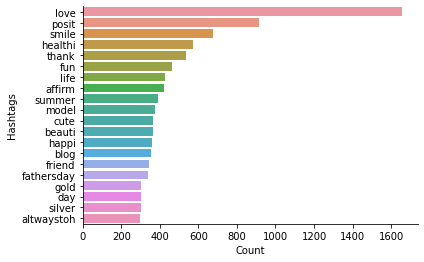

In [63]:
df_positive_plot = df_positive.nlargest(20,columns='Count')

sns.barplot(data=df_positive_plot,y='Hashtags',x='Count')
sns.despine()

# For Negative Tweets in the dataset

# Counting the frequency of the words having Negative Sentiment

In [64]:
word_freq_negative = nltk.FreqDist(ht_negative_unnest)

word_freq_negative

FreqDist({'cnn': 10,
          'michigan': 2,
          'tcot': 14,
          'australia': 6,
          'opkillingbay': 5,
          'seashepherd': 22,
          'helpcovedolphin': 3,
          'thecov': 4,
          'neverump': 8,
          'xenophobia': 12,
          'love': 11,
          'peac': 8,
          'race': 14,
          'ident': 1,
          'med': 1,
          'altright': 18,
          'whitesupremaci': 6,
          'linguist': 1,
          'power': 2,
          'raciolinguist': 1,
          'brexit': 27,
          'peopl': 11,
          'trump': 136,
          'republican': 13,
          'michelleobama': 8,
          'knick': 1,
          'golf': 1,
          'jewishsupremacist': 1,
          'libtard': 77,
          'sjw': 75,
          'liber': 81,
          'polit': 95,
          'trash': 1,
          'hate': 37,
          'stereotyp': 4,
          'prejudic': 3,
          'hope': 5,
          'conflict': 1,
          'pol': 1,
          'bluelivesmatt': 3,
          

In [65]:
df_negative = pd.DataFrame({'Hashtags':list(word_freq_negative.keys()),'Count':list(word_freq_negative.values())})

df_negative.head(10)

,Hashtags,Count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5
5,seashepherd,22
6,helpcovedolphin,3
7,thecov,4
8,neverump,8
9,xenophobia,12


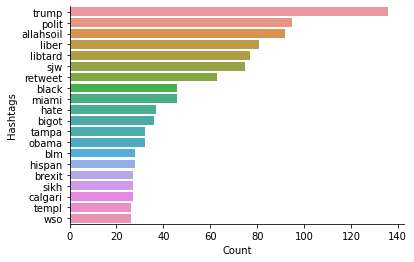

In [66]:
df_negative_plot = df_negative.nlargest(20,columns='Count') 

sns.barplot(data=df_negative_plot,y='Hashtags',x='Count')
sns.despine()